In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data-income-age-group.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


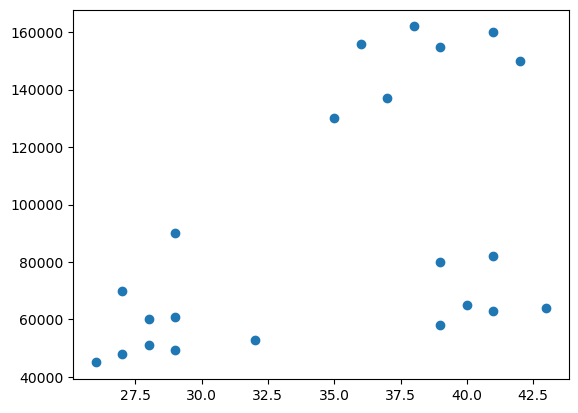

In [4]:
plt.scatter(df['Age'] , df['Income($)'])

In [5]:
km = KMeans(n_clusters =3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age' ,'Income($)']])


C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['cluster']=y_predicted

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


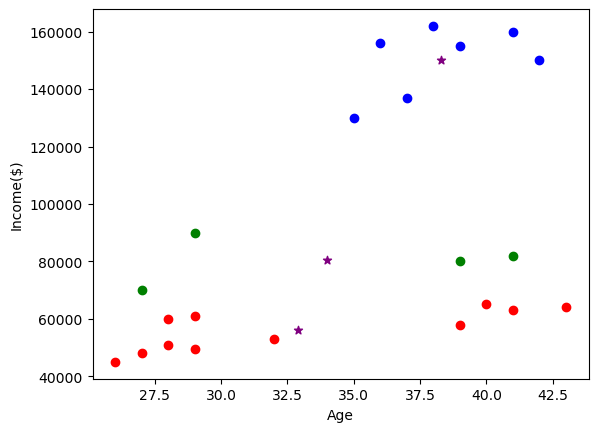

In [10]:
df1 =df[df['cluster']==0]
df2 =df[df['cluster']==1]
df3 =df[df['cluster']==2]

plt.scatter(df1['Age'] , df1['Income($)'] , color = 'red')
plt.scatter(df2['Age'] , df2['Income($)'] , color = 'blue')
plt.scatter(df3['Age'] , df3['Income($)'] , color = 'green')

plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , color = 'purple' , marker = '*' , label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [11]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [12]:

scaler = MinMaxScaler()

# Scaling 'Income($)'
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Scaling 'Age'
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [13]:
km = KMeans(n_clusters =3)
km
y_predicted = km.fit_predict(df[['Age' ,'Income($)']])

C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
df['cluster']=y_predicted

In [15]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


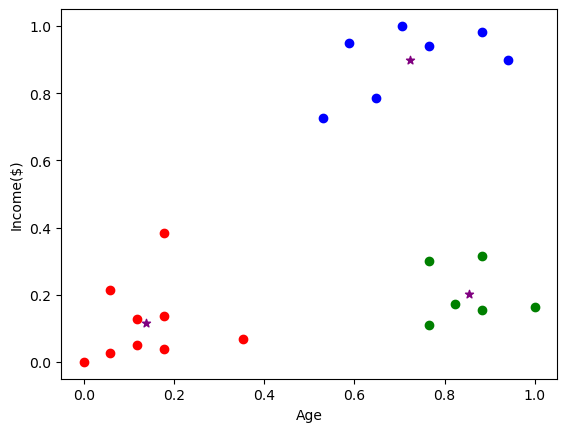

In [16]:
df1 =df[df['cluster']==0]
df2 =df[df['cluster']==1]
df3 =df[df['cluster']==2]

plt.scatter(df1['Age'] , df1['Income($)'] , color = 'red')
plt.scatter(df2['Age'] , df2['Income($)'] , color = 'blue')
plt.scatter(df3['Age'] , df3['Income($)'] , color = 'green')

plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , color = 'purple' , marker = '*' , label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [21]:
# to determine best values of k
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' ,'Income($)']])
    sse.append(km.inertia_)


C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

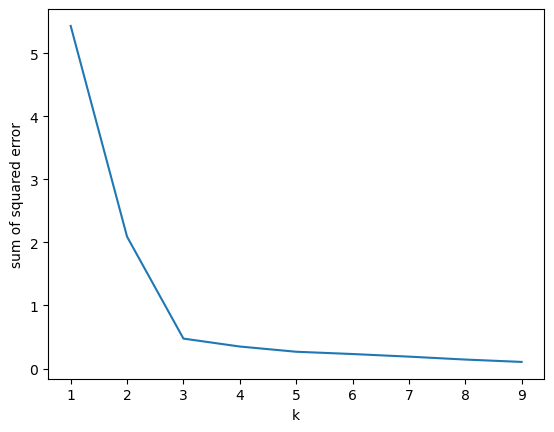

In [22]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng , sse)